# House Price Prediction

In [417]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import pickle
import streamlit as st
import warnings
warnings.filterwarnings('ignore')

# Loading DataSet

In [418]:
dataset= pd.read_csv("C:/Users/umari/OneDrive/Desktop/FSDS DATASETs/House_data.csv")

In [419]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [420]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [421]:
dataset.shape

(21613, 21)

In [422]:
dataset.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# It looks like there no null values in over dataset

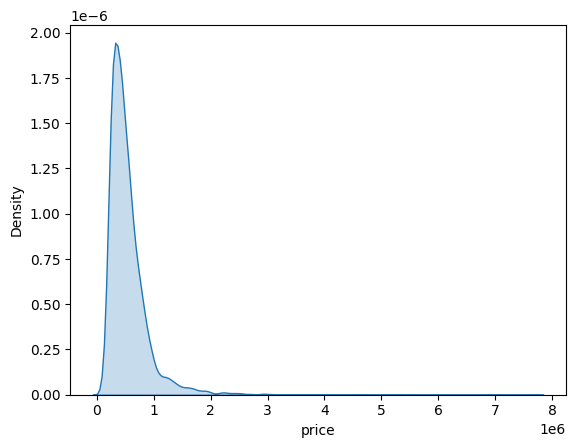

In [423]:
sns.kdeplot(dataset['price'],fill=True)
mean = dataset['price'].mean()
plt.show()

# Outliers

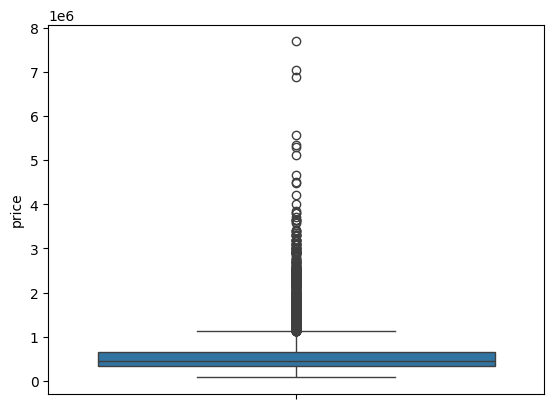

In [424]:
sns.boxplot(dataset['price'])
plt.show()

In [425]:
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3-Q1
IQR

323050.0

In [426]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [427]:
outliers = dataset[(dataset['price']<lower_limit)|(dataset['price']>upper_limit)]
outliers.shape

(1159, 21)

# Removing outliers 

In [428]:
dataset_clean = dataset[(dataset['price']>=lower_limit) & (dataset['price']<=upper_limit)]

In [429]:
dataset_clean.shape

(20454, 21)

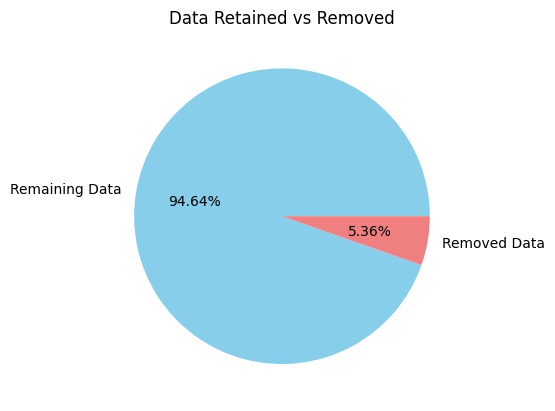

In [430]:
# Calculate counts
removed = len(dataset) - len(dataset_clean)
remaining = len(dataset_clean)

# Pie chart
plt.pie(
    [remaining, removed],
    labels=["Remaining Data", "Removed Data"],
    autopct="%.2f%%",
    colors=["skyblue", "lightcoral"]
)
plt.title("Data Retained vs Removed")
plt.show()

In [431]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [432]:
cat_col = dataset.select_dtypes(include='object').columns.tolist()

In [433]:
binary_col = [col for col in cat_col if dataset[col].nunique()==2]

In [434]:
binary_col

[]

In [435]:
#checking if any value is missing
print(dataset.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [436]:
#checking for categorical data
print(dataset.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [437]:
#dropping the id and date column
dataset = dataset.drop(['price','date'], axis = 1)

In [438]:
print(dataset.columns)

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


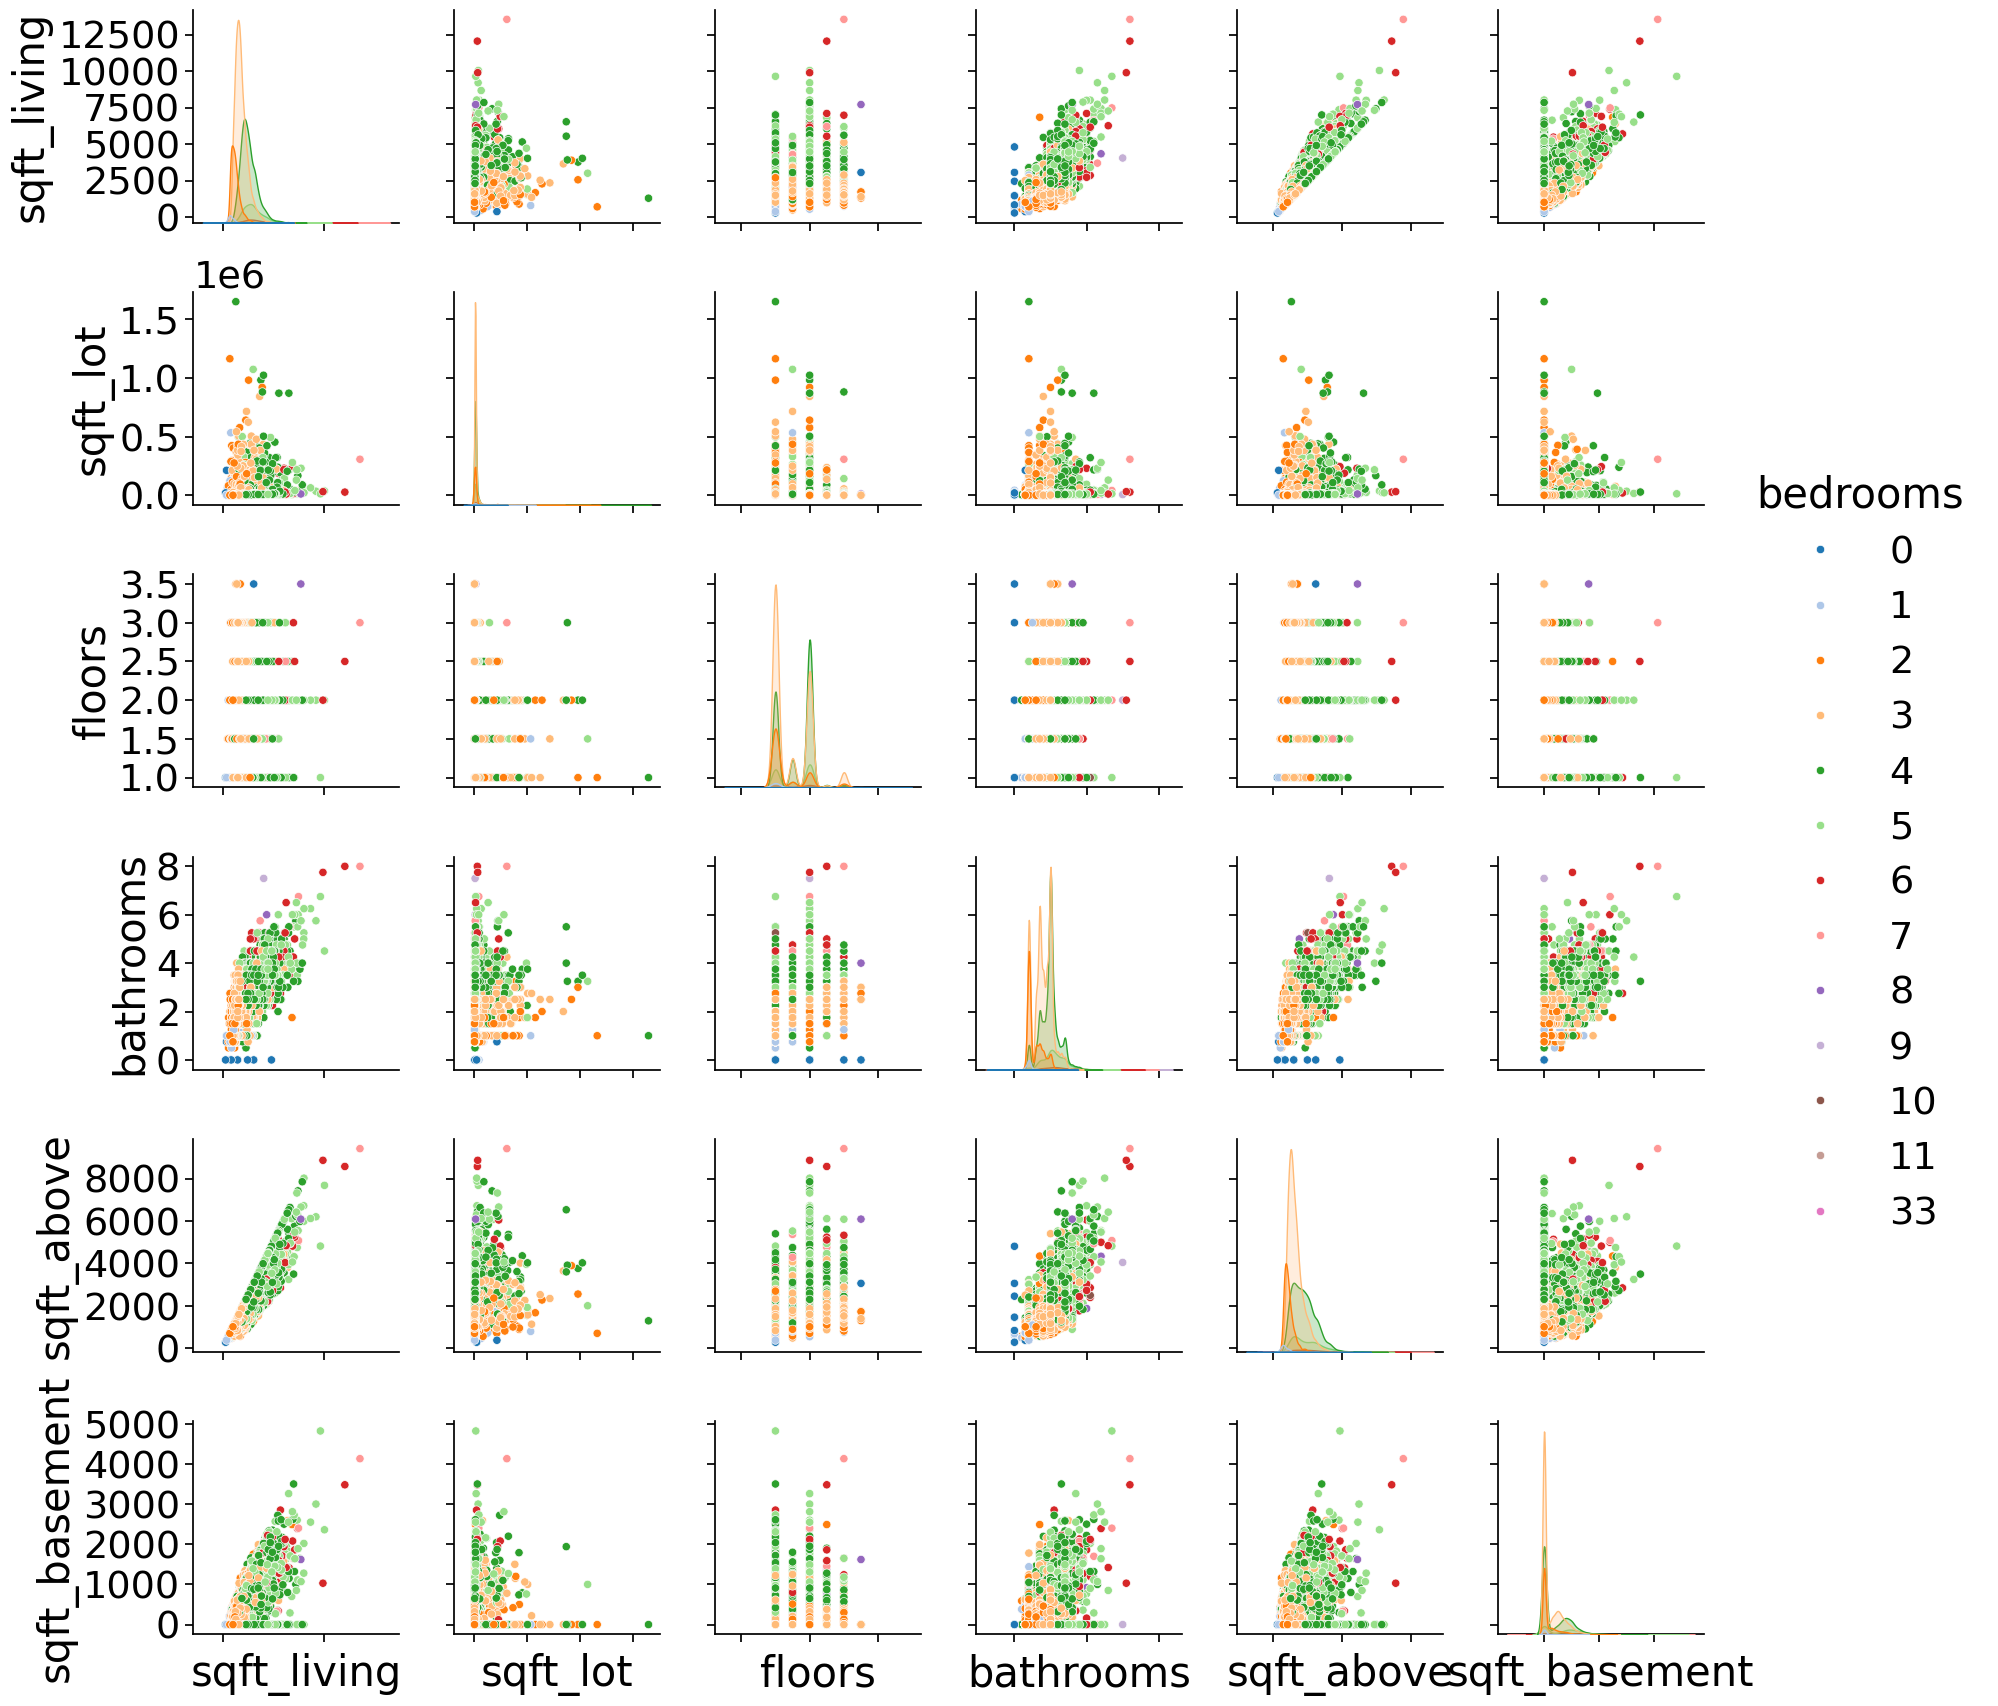

In [439]:
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(
        dataset[['sqft_living', 'sqft_lot', 'floors', 'bedrooms',
                 'bathrooms', 'sqft_above', 'sqft_basement']],
        hue='bedrooms',
        palette='tab20',
        height=3
    )
    g.set(xticklabels=[])

In [440]:
df.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'date_20150510T000000', 'date_20150511T000000', 'date_20150512T000000',
       'date_20150513T000000', 'date_20150514T000000', 'date_20150515T000000',
       'date_20150524T000000', 'date_20150527T000000', 'log_bed', 'log_price'],
      dtype='object', length=393)

# Encoding

In [441]:
le = LabelEncoder()
for col in binary_col:
    df[col] = le.fit_transform(df[col])

In [442]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000,log_bed,log_price
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.309987
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,13.195616
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.098612,12.100718
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,False,False,False,False,False,False,False,False,1.609438,13.311331
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,13.142168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.793862
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.609438,12.899222
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.098612,12.904461
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.899222


In [443]:
cat_col = [col for col in cat_col if col in df.columns]

In [444]:
mult_col = [col for col in cat_col if df[col].nunique()>2]
mult_col

[]

In [445]:
df = pd.get_dummies(df,columns=mult_col,drop_first=True)

In [446]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000,log_bed,log_price
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.309987
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,13.195616
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.098612,12.100718
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,False,False,False,False,False,False,False,False,1.609438,13.311331
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,13.142168


In [447]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000,log_bed,log_price
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.309987
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,13.195616
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.098612,12.100718
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,False,False,False,False,False,False,False,False,1.609438,13.311331
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,13.142168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.793862
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.609438,12.899222
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.098612,12.904461
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.899222


# Splitting Data

In [448]:
X = df.drop(columns=['price'])
y = df['price']

In [449]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [450]:
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000,log_bed,log_price
8184,510002506,2,1.50,1170,1079,3.0,0,0,3,7,...,False,False,False,False,False,False,False,False,1.098612,13.037896
3291,9417400215,2,1.00,820,4880,1.0,0,0,4,6,...,False,False,False,False,False,False,False,False,1.098612,12.802161
9192,7899800476,2,2.50,1250,1580,2.0,0,0,3,7,...,False,False,False,False,False,False,False,False,1.098612,12.495382
17517,3034200275,3,1.75,1240,8611,1.0,0,0,4,7,...,False,False,False,False,False,False,False,False,1.386294,12.847929
7514,2473002700,3,1.75,2410,8944,1.0,0,0,4,8,...,False,False,False,False,False,False,False,False,1.386294,12.936036


# Model Training

In [451]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Model Predictions

In [452]:
y_pred = lr.predict(X_test)

In [453]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
r2 = r2_score(y_test,y_pred)

In [454]:
mse,rmse,r2

(23766631001.88002, 154164.29872665077, 0.8361038970347905)

In [455]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'date_20150510T000000', 'date_20150511T000000', 'date_20150512T000000',
       'date_20150513T000000', 'date_20150514T000000', 'date_20150515T000000',
       'date_20150524T000000', 'date_20150527T000000', 'log_bed', 'log_price'],
      dtype='object', length=393)

# to improve R2

In [456]:
 #Log transform
df['log_bed'] = np.log1p(df['bedrooms'])
df['log_price'] = np.log1p(df['price'])

In [457]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000,log_bed,log_price
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.309987
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,13.195616
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.098612,12.100718
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,False,False,False,False,False,False,False,False,1.609438,13.311331
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,13.142168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.793862
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.609438,12.899222
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.098612,12.904461
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,False,False,False,False,False,False,False,False,1.386294,12.899222


In [458]:
X = df.drop(columns=['price','log_price','id'])
y = df['log_price']

In [459]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,date_20150509T000000,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000,log_bed
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,False,False,False,False,False,False,False,False,False,1.386294
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,False,False,False,False,False,False,False,False,False,1.386294
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,False,False,False,False,False,False,False,False,False,1.098612
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,False,False,False,False,False,False,False,False,False,1.609438
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,False,False,False,False,False,False,False,False,False,1.386294


In [460]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [461]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [462]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
r2 = r2_score(y_test,y_pred)
mse,rmse,r2

(0.06452738863284395, 0.254022417579323, 0.7735912486878953)

In [463]:
filename='lr_model.pkl'

In [464]:
# Save model
with open("filename", "wb") as f:
    pickle.dump(lr, f)

In [465]:
# --- CONFIGURATION ---
DATA_FILE = "C:/Users/umari/OneDrive/Desktop/FSDS DATASETs/House_data.csv"  # <<< CHANGE THIS TO YOUR ACTUAL DATASET FILE NAME
MODEL_OUTPUT_FILE = "lr_model.pkl"
# ---------------------

# 1. Load the dataset
try:
    df = pd.read_csv(DATA_FILE)
except FileNotFoundError:
    print(f"Error: The file '{DATA_FILE}' was not found. Please check the path.")
    exit()

# 2. Select only the 7 features used in the Streamlit app, plus the target variable 'price'
FEATURE_COLUMNS = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'grade', 'waterfront', 'yr_built'
]
TARGET_COLUMN = 'price'

# Ensure all columns exist before proceeding
if not all(col in df.columns for col in FEATURE_COLUMNS + [TARGET_COLUMN]):
    missing = [col for col in FEATURE_COLUMNS + [TARGET_COLUMN] if col not in df.columns]
    print(f"Error: Missing columns in the dataset: {missing}")
    exit()

df_subset = df[FEATURE_COLUMNS + [TARGET_COLUMN]].copy()

# 3. Define X and y
X = df_subset[FEATURE_COLUMNS]
y = df_subset[TARGET_COLUMN]

# 4. Split data (optional, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Check the number of features the model was trained on (should be 7)
print(f"Model trained successfully on {regressor.n_features_in_} features.")

# 6. Save the new model
with open(MODEL_OUTPUT_FILE, 'wb') as file:
    pickle.dump(regressor, file)

print(f"\nSUCCESS: A new model trained on 7 features has been saved as '{MODEL_OUTPUT_FILE}'.")
print("You can now run your Streamlit app!")

Model trained successfully on 7 features.

SUCCESS: A new model trained on 7 features has been saved as 'lr_model.pkl'.
You can now run your Streamlit app!
